<img src="https://learnonline.gmit.ie/pluginfile.php/1/theme_adaptable/logo/1538655948/Transparent%20new.png" align="left">


<h1>Higher Diploma in Science in Computing (Data Analytics) - Machine Learning and Statistics</h1>
<h2>Boston House Prices Dataset Project 2019</h2>
<h3>Cóbhan Phillipson - G00174503</h3>
<hr>

<h3><u>Introduction</u></h3>

<p>This project is conducted as part of the Machine Learning and Statisitcs module on the Higher Diploma in Science in Computing (Data Analytics) in GMIT. The project is based on the Boston House Prices dataeet and we are instructed by the following guidelines:</p>
<ol><li><strong>Describe:</strong> Create a jupyter notebook that uses descriptive statistics and plots to describe the Boston House Prices dataset.</li> 
<li><strong>Infer:</strong> Add a section where you use inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t.</li>
<li><strong>Predict:</strong> Use keras to create a neural network that can predict the median house price based on the other variables in the dataset. </li></ol>
<hr>


<h4>Import Libraries</h4>
<p>In this project, I will use a number of Python packages. The first port of call is to import these packages into this notebook.</p>

In [5]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

%matplotlib inline

<h3><u>Section 1 - Describe</u></h3>
<h4>About the Boston House Prices Dataset</h4>
<p>This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Massachusetts. It was first published in 1978 in the Journal of Environmental Economics and Management, volume 5 as part of an article investigating the willingness of people in the Boston metroploitan area to pay for clean air.</p>

<p>The article was written by David Harrison, Jr. and Daniel L. Rubinfeld and found that marginal air pollution damages (as revealed in the housing market) are found to increase with the level of air pollution and with household income.[1] The dataset is small in size with only 506 rows and 13 columns.</p>

<p>To get a full description of the dataset, we can use the sklearn' DESCR attribute which provides us with a free-text description of the data</p>

In [6]:
#Import Boston House Price Data Set - sklearn comes with built in datasets which include Boston House Prices Dataset
from sklearn.datasets import load_boston 
boston_dataset = load_boston()
print(boston_dataset.DESCR) 

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

<p>One thing to note in the dataset notes is that the median value (MEDV) is the target variable here and the other values are feature variables which can be used to predict house prices. <p>

In [7]:
# create a pandas dataframe with the House Price Dataset
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names) 
# return the first 5 rows of our dataset to ensure everything has imported correctly
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<p>The first thing we notice here is that our target value MEDV is missing from our dataframe and must be created.</p>

In [8]:
df['MEDV'] = boston_dataset.target #add median
df.head() #return first five rows again to check median is included

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<hr>
<h4>Key Statistics</h4>
<p>To begin our initial exploration of the data, it is worth identifying some key statistics. We can use pandas to describe our dataset</p>


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<p>Before we go any further, it is also worthwhile checking out the distribution of our target variable, the median house value.</p>

Text(0.5,0,'Median House prices in $1000')

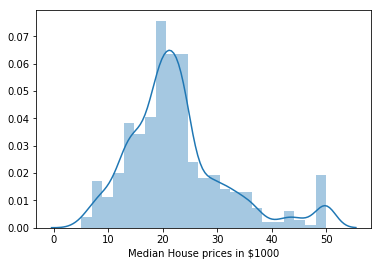

In [12]:
#Check distribution of target variable
sns.distplot(df['MEDV'])
plt.xlabel("Median House prices in $1000")


<p>Using seaborn distplot we can quickly see that the distribution of the median house prices per town is positively skewed. The outliers in this data set are in the high value towns and suburbs where the median price is high.</p>

<p>Next, it would be valuable to learn about the correlation behavior of the other attributes with our target variable. A Seaborn heatmap can present us with this correlation info. Seaborn</p> 

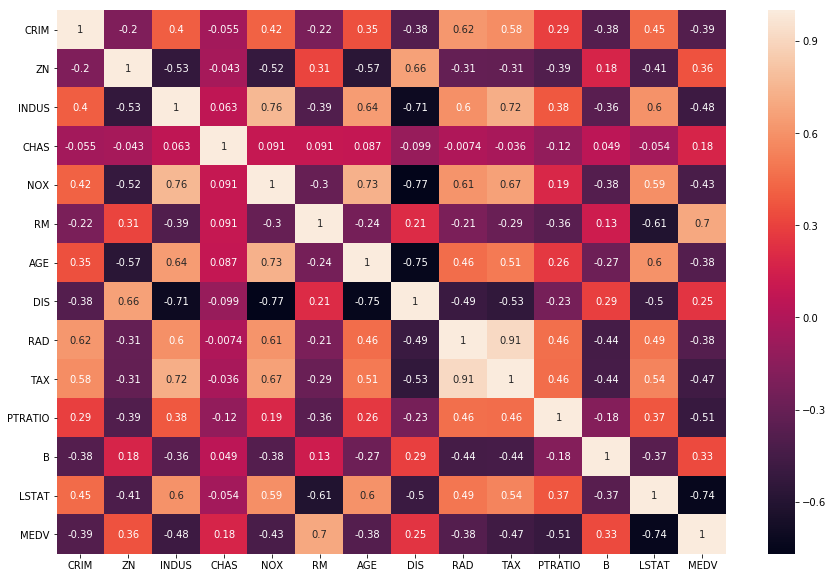

In [13]:
# correlation plot
correlation_matrix = df.corr()  
plt.figure(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True) #set annot to true to add descriptive value to each cell

<p>The last row of the heatmap shows us the correlation of all variables against the median values. Because we turned on the annotations, our map returns a numeric correlation score which helps us understand our data. The correlation score ranges from -1 to 1. Going one step further, we can do a quick print out of the correlation scores. A high correlation score indicates that there is a positive correlation between the values and both change in the same direction, while negative correlation score indicates that variables change in the opposite direction. (https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/)</p>

In [16]:
print (correlation_matrix['MEDV'].sort_values(ascending=False), '\n') 

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.385832
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64 



<p>There are a number of insights we gain from our heatmap:</p>
<ul><li>As the average number of rooms per dwelling increases so does the median value of homes.</li>
<li>Homes in towns with a higher proportion of residential land zoned for lots of over 25,000 sq. ft. have a higher value than those in towns with less residential zones.</li>
<li>Homes in towns with a proportionately higher black population have a higher median value than homes with proportionately lower black population.</li>
<li>Proximity to Boston employment centers increases house value.</li>
<li>Median house value decreases as the percentage of people from what was considered a "lower status" in a town increases. A high percentage of "lower status" people in a town is in fact the greatest contributing factor involved in lowering the house price.</li></ul>